# Analysis of Major Shifts at the University of Washington

Created by Lovenoor (Lavi) Aulck. Part of project examining persistence and performance of community college transfers. Published in PLOS One (currently under review - link will be added once published).  

## Overview of notebook

This notebook contains code to conduct an analysis of students' shifts in undergraduate majors using aggregated student data.

## Data format

The notebook assumes input data in csv format in files named 'graduates.csv' and 'noncompletions.csv' with one entry per student and the following columns. These files are created in the associated analysis script (https://github.com/lovenoor/plos_one_student_transfers/blob/master/TransferStudentAnalysis.ipynb). In addition, a data file containing students' complete transcript records (including their academic major for each quarter/term) is also required in a .txt file named 'gpa.txt'

### Import packages

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import pylab;
from matplotlib import rc;
% matplotlib inline

rc('font', family = 'Times New Roman')

### Import data

In [2]:
dataGrad = pd.read_csv('graduates.csv', low_memory=False)
dataNc = pd.read_csv('noncompletions.csv', low_memory=False)
gpa = pd.read_table('gpa.txt')

In [3]:
gradsFr = dataGrad[dataGrad.last_schooling == 1].system_key.values
grads2yr = dataGrad[dataGrad.last_schooling == 2].system_key.values
grads4yr = dataGrad[dataGrad.last_schooling == 3].system_key.values

In [4]:
ncFr = dataNc[dataNc.last_schooling == 1].system_key.values
nc2yr = dataNc[dataNc.last_schooling == 2].system_key.values
nc4yr = dataNc[dataNc.last_schooling == 3].system_key.values

### Filter transcript data

In [5]:
transInfo = gpa #hold the gpa variable (in case it needs to be referenced later)
transInfo = transInfo[transInfo.system_key.isin(np.append(dataGrad.system_key, dataNc.system_key))] #use only students of interest
#most of the below filtering is very much specific to the UW
transInfo = transInfo[transInfo.course_number < 500] #look at only UG courses
transInfo = transInfo[transInfo['class'] > 0] #look at only UGs
transInfo = transInfo[transInfo['class'] < 5]
transInfo = transInfo[transInfo.course_branch == 0] #look only at UW Seattle
transInfo = transInfo[transInfo.grade_system != 9] #use only graded classes
transInfo = transInfo[transInfo.tran_major_abbr != 'N MATR'] #do not use non-matriculated students

### Create major groupings

In [6]:
transInfo = transInfo.sort_values(['tran_yr', 'tran_qtr'], ascending = [1, 1]) #sort data by date
#create major groupings - major abbreviations are specific to UW. Majors are further grouped later.

#business
baReplaceList = ['FINANC', 'MKTG', 'I S', 'HRMGT', 'ACCTG', 'BUS E', 'ENTRE', 'PEI', 'CISB']
#engineering
engrReplaceList = ['A A', 'BIOEN', 'CHEM E', 'IND E', 'M E', 'E E', 'CIV E', 'HCDE', 'CER E', 'MS E', 'INT EN', 'MET E']
#languages
langReplaceList = ['GERMAN', 'SPAN', 'JAPAN', 'FRENCH', 'ITAL', 'DANISH', 'LATIN', 'KOREAN', 'GREEK', 'CHIN', 'NORW', 
                   'SWED', 'RUSS']
#communications
comReplaceList = ['LING', 'COM', 'CMU', 'CMU E', 'COM E', 'SP CMU', 'T C', 'ROM LI']
#biology
biolReplaceList = ['ZOOL', 'BOTANY', 'NBIO', 'MICRO', 'BIOL', 'SPHSC']
#chemistry
chemReplaceList = ['CHEM']
#math
mathReplaceList = ['ACMS', 'MATH', 'STAT']
#physics
physReplaceList = ['ASTR', 'PHYS']
#political science
polSciReplaceList = ['POL S', 'SOC WF', 'POLS E', 'LSJ', 'SO JU']
#english
engReplaceList = ['C LIT', 'ENGL E', 'ENGL']
#international studies
sisReplaceList = ['SISA', 'SISSA', 'SISJE', 'SISSA', 'SISCA', 'SISRE', 'SISSE', 'SISJA', 'SISKO', 'RELIG', 'SISLA', 'EURO',
                 'NEAR E', 'SIS', 'EELLC', 'SCAND', 'SCAN A', 'ASIAN', 'SLAVIC', 'SASIAN']
#history
histReplaceList = ['CHID', 'HIST E', 'HIST', 'HPS']
#general studies
genStReplaceList = ['INDIV', 'GEN ST']
#architecture
archReplaceList = ['CAUP', 'L ARCH', 'ARCHST', 'CM', 'CEP']
#health sciences
healthReplaceList = ['NURS', 'ENV H', 'MED T', 'D HYG', 'HIHIME', 'PR O', 'HIA E', 'O T', 'PH']
#education
educReplaceList = ['ECFS']
#philosophy
philReplaceList = ['PHIL']
#classics
clasReplaceList = ['CLAS', 'CL ST']
#forest resources
forResReplaceList = ['FOR PP', 'FOR R', 'FOR EE', 'FOR E', 'SRS', 'UR FOR', 'F MGMT', 'EHUF', 'PSE', 'WLD S', 'CN WR']
#environmental sciences
envReplaceList = ['AFS', 'ATM S', 'BSE', 'ESS', 'ENVIR', 'ESRM', 'OCEAN', 'ENV S', 'FISH', 'GEOL']
#computer science
compSciReplaceList = ['CMP E', 'INFO', 'C SCI']
#sociology
socReplaceList = ['SOC', 'SOC E']
#psychology
psychReplaceList = ['PSYCH', 'PSY E']
#anthropology
anthReplaceList = ['ANTH', 'ANTH E']
#american and women studies
amerReplaceList = ['WOMEN', 'GWSS', 'AES', 'AIS', 'AFRAM']
#art
artReplaceList = ['ART H', 'ART', 'DXARTS']
#performing arts
perfArtReplaceList = ['MUSAP', 'DRAMA', 'MUSIC', 'DANCE', 'ETHNOM']
#social welfare
socWfReplaceList = ['SOC WF']
#economics
econReplaceList = ['ECON']

In [7]:
#the below are majors not of interest - premajors and majors at satellite campuses. Also, professional programs
premajReplaceList = ['TPRMAJ', 'UWACAD', 'PMJ E', 'EXPBA', 'PREHUM', 'EPRMJ', 'PRENUR', 'PRESCI', 'EXPENG', 'PRE HS', 
                     'PRENGR', 'PSOCS', 'PREMAJ', 'PRE BA', 'PREART', 'PREARC', 'B PRE', 'PRE FE', 'BPRNUR', 'TPRCES',
                    'PREFOR', 'PRE EH', 'TPREBA', 'TPRCSS', 'BPRCSS', 'PREPSE', 'EEP', 'PBUS E', 'EXPNUR', 'PREBSE']
bothIasReplaceList = ['BISAMS', 'BISCP', 'BLSDBL', 'BISSTE', 'BLSAMS', 'BISCLA', 'BENSCI', 'BISGST', 
                     'BISSEB', 'BLSSEB', 'BLSSTE', 'BLSGST', 'BLSCLA', 'CSS']
tacIasReplaceList = ['TGS', 'TESC', 'TPOLVA', 'TPOLEC', 'TSS', 'TGLBST', 'TIAS', 'TGLBST', 'TSS', 'TGLBST', 'TLSSS', 'TAMC',
                    'TAM', ]
medexReplaceList = ['MEDXC', 'MEDXD']

In [8]:
#parse through each major and get its grouping
cleaned = []
for each in transInfo.tran_major_abbr:
    each = each.strip()
    if each in baReplaceList:
        each = 'B A'
    elif each in engrReplaceList:
        each = 'ENGR'
    elif each in langReplaceList:
        each = 'LANG'
    elif each in comReplaceList:
        each = 'COM'
    elif each in biolReplaceList:
        each = 'BIOL'
    elif each in chemReplaceList:
        each = 'CHEM'
    elif each in physReplaceList:
        each = 'PHYS'
    elif each in mathReplaceList:
        each = 'MATH'
    elif each in polSciReplaceList:
        each = 'POL S'
    elif each in engReplaceList:
        each = 'ENGL'
    elif each in sisReplaceList:
        each = 'INT ST'
    elif each in histReplaceList:
        each = 'HIST'
    elif each in genStReplaceList:
        each = 'GEN ST'
    elif each in archReplaceList:
        each = 'ARCH'
    elif each in healthReplaceList:
        each = 'BIOL'
    elif each in educReplaceList:
        each = 'EDUC'
    elif each in amerReplaceList:
        each = 'GWAS'
    elif each in premajReplaceList:
        each = 'PRE'
    elif each in comReplaceList:
        each = 'ENGL'
    elif each in compSciReplaceList:
        each = 'ENGR'
    elif each in forResReplaceList:
        each = 'ENVIR'
    elif each in envReplaceList:
        each = 'ENVIR'
    elif each in socReplaceList:
        each = 'SOC'
    elif each in psychReplaceList:
        each = 'PSYCH'
    elif each in anthReplaceList:
        each = 'ANTH'
    elif each in artReplaceList:
        each = 'ART'
    elif each in perfArtReplaceList:
        each = 'PART'
    elif each in econReplaceList:
        each = 'ECON'
    elif each in philReplaceList:
        each = 'PHIL'
    elif each in clasReplaceList:
        each = 'LANG'
    elif each in medexReplaceList:
        each = 'MEDX'
    cleaned.append(each)

In [9]:
#remove duplicate student/major combos and further pruning - use only majors with an appreciable number of students
transInfo['cleaned'] = pd.Series(cleaned, index = transInfo.index)
majorCounts = transInfo.drop_duplicates(['system_key', 'cleaned'])
majorCounts = majorCounts[majorCounts.cleaned != 'PRE']
majorCounts = majorCounts[majorCounts.cleaned != 'EDUC']
majorCounts = majorCounts[majorCounts.cleaned != 'DESIGN']
majorCounts = majorCounts[majorCounts.cleaned != 'SOCS E']
majorCounts = majorCounts[majorCounts.cleaned != 'HUM E']
majorCounts = majorCounts[majorCounts.cleaned != 'MEDX']

In [10]:
#store data for each group - completions and non-completions
majorCountsFrGrad = majorCounts[majorCounts.system_key.isin(gradsFr)]
majorCounts2yrGrad = majorCounts[majorCounts.system_key.isin(grads2yr)]
majorCounts4yrGrad = majorCounts[majorCounts.system_key.isin(grads4yr)]
majorCountsFrNc = majorCounts[majorCounts.system_key.isin(ncFr)]
majorCounts2yrNc = majorCounts[majorCounts.system_key.isin(nc2yr)]
majorCounts4yrNc = majorCounts[majorCounts.system_key.isin(nc4yr)]

In [11]:
#tags associated with each major grouping used. These are used in the heatmap plotting
labels = ['GEN ST', 'PART', 'ART', 'ENGL', 'COM', 'LANG', 'PHIL', 'PSYCH', 'SOC', 'ANTH', 'GEOG', 'HIST', 'GWAS', 
          'INT ST', 'POL S', 'B A', 'ECON', 'ARCH', 'ENVIR', 'ENGR', 'CHEM', 'BIOCHM', 'BIOL', 'PHYS', 'MATH']
tags = ['General & Individualized Studies', 'Music & Performing Arts', 'Art & Art History', 'English & Comparative Lit.', 
        'Communication & Linguistics', 'Languages & Classics', 'Philosophy', 'Psychology', 'Sociology', 'Anthropology', 
        'Geography', 'History', 'Gender & American Studies', 'International Studies', 'Law & Political Science', 'Business', 
        'Economics', 'Architecture', 'Earth & Environmental Sci.', 'Engineering (All) & Comp. Sci.', 
        'Chemistry', 'Biochemistry', 'Biological & Health Sciences', 'Physics & Astronomy', 'Math & Statistics']

### Calculate adjacency matrix for cleaned majors

In [12]:
#initialize empty matrices for graduates
matrixAllGrad = np.zeros((len(tags), len(tags)))
matrixFrGrad = np.zeros((len(tags), len(tags)))
matrix2yrGrad = np.zeros((len(tags), len(tags)))
matrix4yrGrad = np.zeros((len(tags), len(tags)))

#look at each student's data
students = dataGrad.system_key
for each in students:
    subsetMat = np.zeros((len(tags), len(tags)))
    currentDF = majorCounts[majorCounts.system_key == each]
    majors = currentDF.cleaned
    currentMajor = ''
    #look at each major declared (previously filtered for duplicates)
    for major in majors:
        if currentMajor:
            currentRow = labels.index(currentMajor)
            currentCol = labels.index(major)
            subsetMat[currentRow, currentCol] = 1 #add to appropriate row (previous major) and column (new major)
            matrixAllGrad = matrixAllGrad + subsetMat #keep track for all graduates
            if each in (gradsFr): #keep track for each group
                matrixFrGrad = matrixFrGrad + subsetMat
            elif each in (grads2yr):
                matrix2yrGrad = matrix2yrGrad + subsetMat
            elif each in (grads4yr):
                matrix4yrGrad = matrix4yrGrad + subsetMat
            else:
                print (each)
        currentMajor = major

In [13]:
#repeat the above but for non-completions
matrixAllNc = np.zeros((len(tags), len(tags)))
matrixFrNc = np.zeros((len(tags), len(tags)))
matrix2yrNc = np.zeros((len(tags), len(tags)))
matrix4yrNc = np.zeros((len(tags), len(tags)))

students = dataNc.system_key
for each in students:
    subsetMat = np.zeros((len(tags), len(tags)))
    currentDF = majorCounts[majorCounts.system_key == each]
    majors = currentDF.cleaned
    currentMajor = ''
    for major in majors:
        if currentMajor:
            currentRow = labels.index(currentMajor)
            currentCol = labels.index(major)
            subsetMat[currentRow, currentCol] = 1
            matrixAllNc = matrixAllNc + subsetMat
            if each in (ncFr):
                matrixFrNc = matrixFrNc + subsetMat
            elif each in (nc2yr):
                matrix2yrNc = matrix2yrNc + subsetMat
            elif each in (nc4yr):
                matrix4yrNc = matrix4yrNc + subsetMat
            else:
                print (each)
        currentMajor = major

### Analyze results

In [14]:
#calculate normalized values for all matrices based on row sums
row_sums = matrixAllGrad.sum(axis=1)
normAllGrad = matrixAllGrad / row_sums[:, np.newaxis]

row_sums = matrixFrGrad.sum(axis=1)
normFrGrad = matrixFrGrad / row_sums[:, np.newaxis]

row_sums = matrix2yrGrad.sum(axis=1)
norm2yrGrad = matrix2yrGrad / row_sums[:, np.newaxis]

row_sums = matrix4yrGrad.sum(axis=1)
norm4yrGrad = matrix4yrGrad / row_sums[:, np.newaxis]

In [15]:
row_sums = matrixAllNc.sum(axis=1)
normAllNc = matrixAllNc / row_sums[:, np.newaxis]

row_sums = matrixFrNc.sum(axis=1)
normFrNc = matrixFrNc / row_sums[:, np.newaxis]

row_sums = matrix2yrNc.sum(axis=1)
norm2yrNc = matrix2yrNc / row_sums[:, np.newaxis]

row_sums = matrix4yrNc.sum(axis=1)
norm4yrNc = matrix4yrNc / row_sums[:, np.newaxis]

In [16]:
print np.sum(matrixAllGrad) #number of shifts for all grads and by group
print np.sum(matrixFrGrad) 
print np.sum(matrix2yrGrad) 
print np.sum(matrix4yrGrad) 
print np.sum(matrixAllGrad) / len(dataGrad) #normalized counts per student for each group
print np.sum(matrixFrGrad) / len(gradsFr)
print np.sum(matrix2yrGrad) / len(grads2yr) 
print np.sum(matrix4yrGrad) / len(grads4yr)
print np.sum(matrixAllGrad) / dataGrad.num_qtrs_tran.sum() * 100 #number of shifts per 100 quarters enrolled
print np.sum(matrixFrGrad) / dataGrad[dataGrad.last_schooling == 1].num_qtrs_tran.sum() * 100 
print np.sum(matrix2yrGrad) / dataGrad[dataGrad.last_schooling == 2].num_qtrs_tran.sum() * 100
print np.sum(matrix4yrGrad) / dataGrad[dataGrad.last_schooling == 3].num_qtrs_tran.sum() * 100

8788.0
5462.0
1499.0
1827.0
0.166294516141
0.192568043999
0.110889184791
0.166636264137
1.43173438948
1.42869474009
1.33513845715
1.53244814253


In [17]:
#print the same as above for non-completions
print np.sum(matrixAllNc)
print np.sum(matrixFrNc)
print np.sum(matrix2yrNc)
print np.sum(matrix4yrNc)
print np.sum(matrixAllNc) / len(dataNc)
print np.sum(matrixFrNc) / len(ncFr)
print np.sum(matrix2yrNc) / len(nc2yr) 
print np.sum(matrix4yrNc) / len(nc4yr)
print np.sum(matrixAllNc) / dataNc.num_qtrs_tran.sum() * 100
print np.sum(matrixFrNc) /  dataNc[dataNc.last_schooling == 1].num_qtrs_tran.sum() * 100
print np.sum(matrix2yrNc) / dataNc[dataNc.last_schooling == 2].num_qtrs_tran.sum() * 100
print np.sum(matrix4yrNc) / dataNc[dataNc.last_schooling == 3].num_qtrs_tran.sum() * 100

1100.0
277.0
234.0
589.0
0.0676007866273
0.0369777065812
0.0562229697261
0.127516778523
0.912893374054
0.543691607129
0.971559061657
1.29555902602


In [18]:
#look at inflow and outflow based on major and each group for grads
sumsRatioAll = np.sum(matrixAllGrad, axis = 1) / np.sum(matrixAllGrad, axis = 0)
sumsRatioFr = np.sum(matrixFrGrad, axis = 1) / np.sum(matrixFrGrad, axis = 0)
sumsRatio2yr = np.sum(matrix2yrGrad, axis = 1) / np.sum(matrix2yrGrad, axis = 0)
sumsRatio4yr = np.sum(matrix4yrGrad, axis = 1) / np.sum(matrix4yrGrad, axis = 0)
sumRatiosGrad = pd.DataFrame({'All':sumsRatioAll}, index = tags)
sumRatiosGrad['Fr'] = sumsRatioFr
sumRatiosGrad['2yr'] = sumsRatio2yr
sumRatiosGrad['4yr'] = sumsRatio4yr
sumRatiosGrad

,All,Fr,2yr,4yr
General & Individualized Studies,0.146739,0.170000,0.114286,0.122449
Music & Performing Arts,1.441558,1.602151,0.958333,1.351351
Art & Art History,2.921659,2.913043,2.944444,2.930233
English & Comparative Lit.,0.755319,0.813187,0.677778,0.672897
Communication & Linguistics,0.660615,0.723684,0.475806,0.617647
Languages & Classics,0.996176,1.040881,0.835294,0.991667
Philosophy,1.344000,1.102941,2.428571,1.166667
Psychology,0.514286,0.577778,0.343434,0.486486
Sociology,0.430233,0.418750,0.418182,0.488372
Anthropology,2.065041,1.942029,2.161290,2.304348


In [19]:
#look at the same as above for non-completions
sumsRatioAll = np.sum(matrixAllNc, axis = 1) / np.sum(matrixAllNc, axis = 0)
sumsRatioFr = np.sum(matrixFrNc, axis = 1) / np.sum(matrixFrNc, axis = 0)
sumsRatio2yr = np.sum(matrix2yrNc, axis = 1) / np.sum(matrix2yrNc, axis = 0)
sumsRatio4yr = np.sum(matrix4yrNc, axis = 1) / np.sum(matrix4yrNc, axis = 0)
sumRatiosNc = pd.DataFrame({'All':sumsRatioAll}, index = tags)
sumRatiosNc['Fr'] = sumsRatioFr
sumRatiosNc['2yr'] = sumsRatio2yr
sumRatiosNc['4yr'] = sumsRatio4yr
sumRatiosNc

,All,Fr,2yr,4yr
General & Individualized Studies,0.150000,0.083333,0.166667,0.181818
Music & Performing Arts,1.375000,0.800000,0.666667,2.000000
Art & Art History,1.581395,0.866667,1.000000,3.250000
English & Comparative Lit.,0.606557,0.866667,1.181818,0.314286
Communication & Linguistics,0.535714,0.500000,0.666667,0.500000
Languages & Classics,1.148936,1.400000,0.571429,1.391304
Philosophy,0.851852,1.000000,1.428571,0.562500
Psychology,0.270833,0.133333,0.400000,0.304348
Sociology,0.424242,0.428571,0.666667,0.350000
Anthropology,1.171429,1.200000,1.500000,1.045455


### Create heatmaps

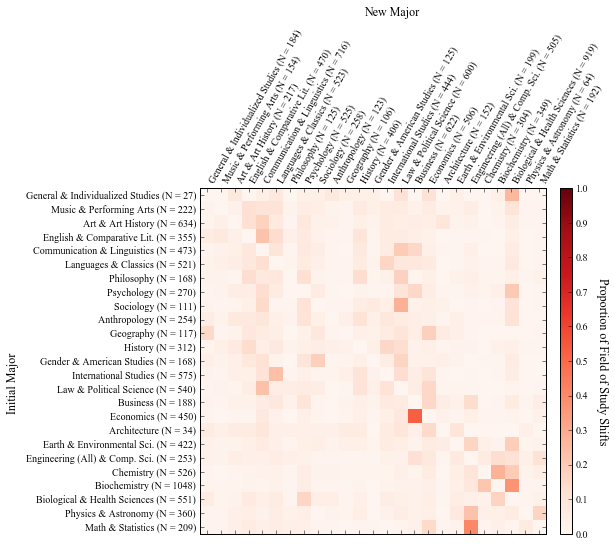

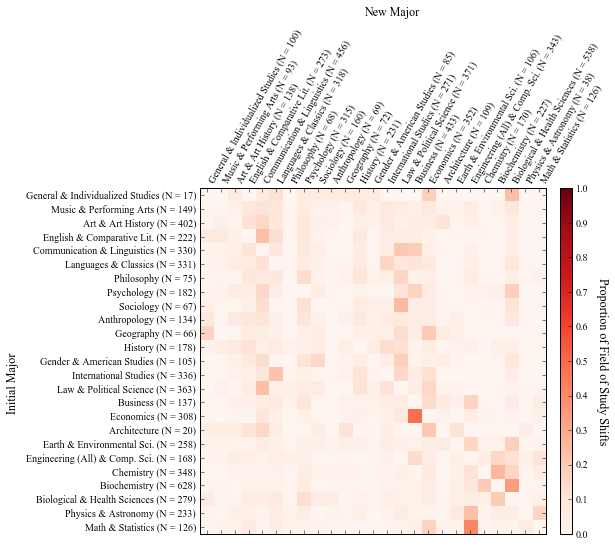

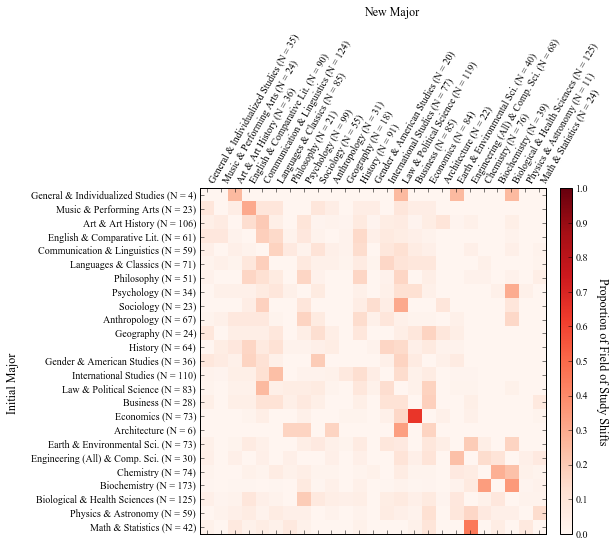

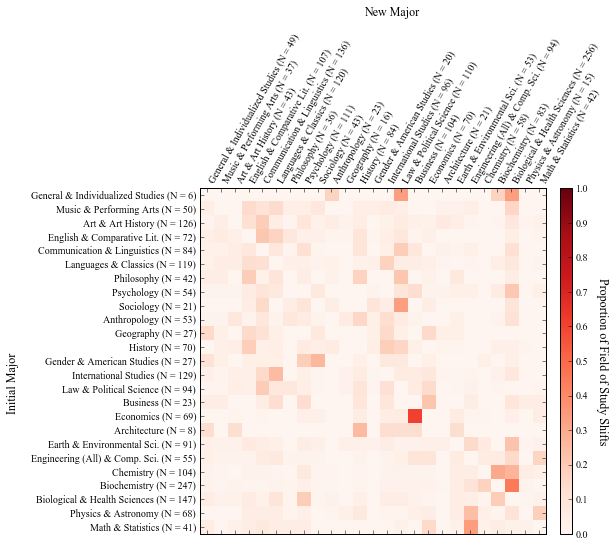

In [43]:
#get column sums for each major (for labels)
sumsAllGrad = [str(int(x)) for x in np.sum(matrixAllGrad, axis = 1)]
sumsFrGrad = [str(int(x)) for x in np.sum(matrixFrGrad, axis = 1)]
sums2yrGrad = [str(int(x)) for x in np.sum(matrix2yrGrad, axis = 1)]
sums4yrGrad = [str(int(x)) for x in np.sum(matrix4yrGrad, axis = 1)]

#get row sums for each major (for labels)
sumsAllColGrad = [str(int(x)) for x in np.sum(matrixAllGrad, axis = 0)]
sumsFrColGrad = [str(int(x)) for x in np.sum(matrixFrGrad, axis = 0)]
sums2yrColGrad = [str(int(x)) for x in np.sum(matrix2yrGrad, axis = 0)]
sums4yrColGrad = [str(int(x)) for x in np.sum(matrix4yrGrad, axis = 0)]

#create heatmap for all graduates. Repeat for all groups. Then repeat for non-completions.
fig = pylab.figure(figsize=(8,8))
axmatrix = fig.add_axes([0.325,0.075,0.6,0.6])
idx1 = tags
idx2 = tags
im = axmatrix.matshow(normAllGrad, origin = 'upper', cmap = pylab.cm.Reds, vmax = 1)
plt.xticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sumsAllColGrad)], rotation = 60, ha = 'left')
plt.yticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sumsAllGrad)])
axcolor = fig.add_axes([0.95,0.075,0.02,0.6])
cbar = pylab.colorbar(im, cax = axcolor)
cbar.ax.set_ylabel('Proportion of Field of Study Shifts', rotation = 270, labelpad = 20, fontsize = 'large')
plt.text(-48, 0.5, 'Initial Major', {'rotation':90, 'size': 'large'})
plt.text(-17, 1.5, 'New Major', {'size': 'large'})
#fig.savefig('heatAll.svg', format='svg', dpi=1200)

fig = pylab.figure(figsize=(8,8))
axmatrix = fig.add_axes([0.325,0.075,0.6,0.6])
idx1 = tags
idx2 = tags
im = axmatrix.matshow(normFrGrad, origin = 'upper', cmap = pylab.cm.Reds, vmax = 1)
plt.xticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sumsFrColGrad)], rotation = 60, ha = 'left')
plt.yticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sumsFrGrad)])
axcolor = fig.add_axes([0.95,0.075,0.02,0.6])
cbar = pylab.colorbar(im, cax = axcolor)
cbar.ax.set_ylabel('Proportion of Field of Study Shifts', rotation = 270, labelpad = 20, fontsize = 'large')
plt.text(-48, 0.5, 'Initial Major', {'rotation':90, 'size': 'large'})
plt.text(-17, 1.5, 'New Major', {'size': 'large'})
#fig.savefig('heatFr.svg', format='svg', dpi=1200)

fig = pylab.figure(figsize=(8,8))
axmatrix = fig.add_axes([0.325,0.075,0.6,0.6])
idx1 = tags
idx2 = tags
im = axmatrix.matshow(norm2yrGrad, origin = 'upper', cmap = pylab.cm.Reds, vmax = 1)
plt.xticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sums2yrColGrad)], rotation = 60, ha = 'left')
plt.yticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sums2yrGrad)])
axcolor = fig.add_axes([0.95,0.075,0.02,0.6])
cbar = pylab.colorbar(im, cax = axcolor)
cbar.ax.set_ylabel('Proportion of Field of Study Shifts', rotation = 270, labelpad = 20, fontsize = 'large')
plt.text(-48, 0.5, 'Initial Major', {'rotation':90, 'size': 'large'})
plt.text(-17, 1.5, 'New Major', {'size': 'large'})
#fig.savefig('heat2yr.svg', format='svg', dpi=1200)

fig = pylab.figure(figsize=(8,8))
axmatrix = fig.add_axes([0.325,0.075,0.6,0.6])
idx1 = tags
idx2 = tags
im = axmatrix.matshow(norm4yrGrad, origin = 'upper', cmap = pylab.cm.Reds, vmax = 1)
plt.xticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sums4yrColGrad)], rotation = 60, ha = 'left')
plt.yticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sums4yrGrad)])
axcolor = fig.add_axes([0.95,0.075,0.02,0.6])
cbar = pylab.colorbar(im, cax = axcolor)
cbar.ax.set_ylabel('Proportion of Field of Study Shifts', rotation = 270, labelpad = 20, fontsize = 'large')
plt.text(-48, 0.5, 'Initial Major', {'rotation':90, 'size': 'large'})
plt.text(-17, 1.5, 'New Major', {'size': 'large'})
#fig.savefig('heat4yr.svg', format='svg', dpi=1200)

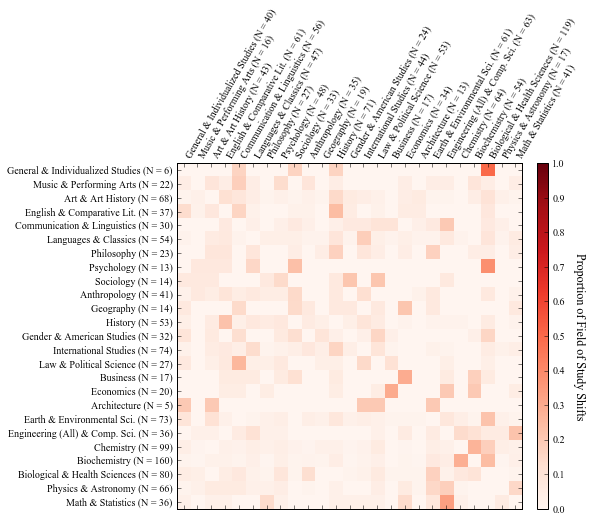

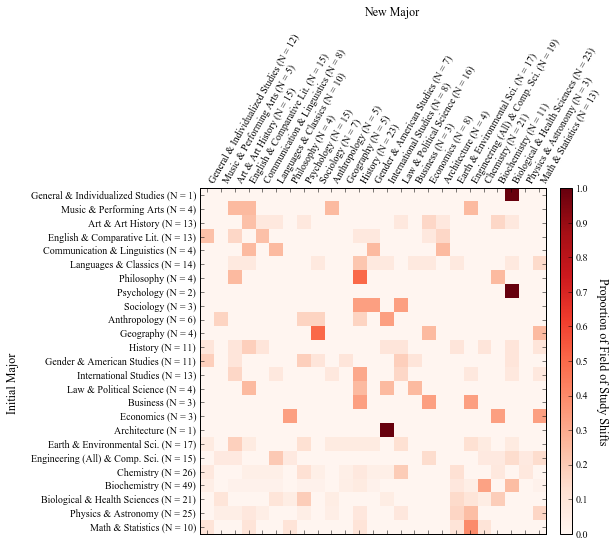

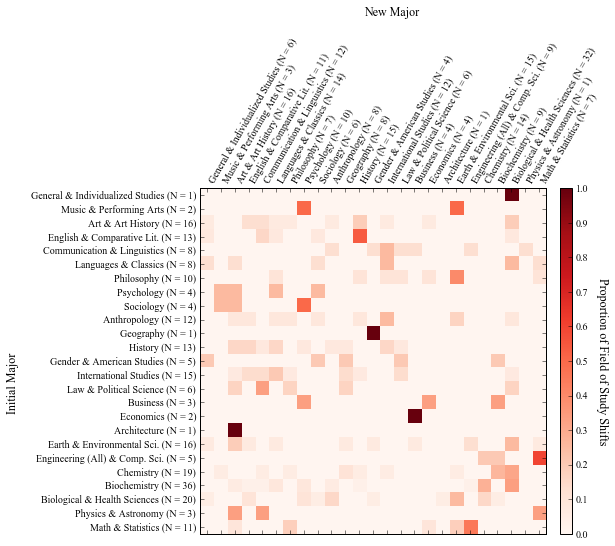

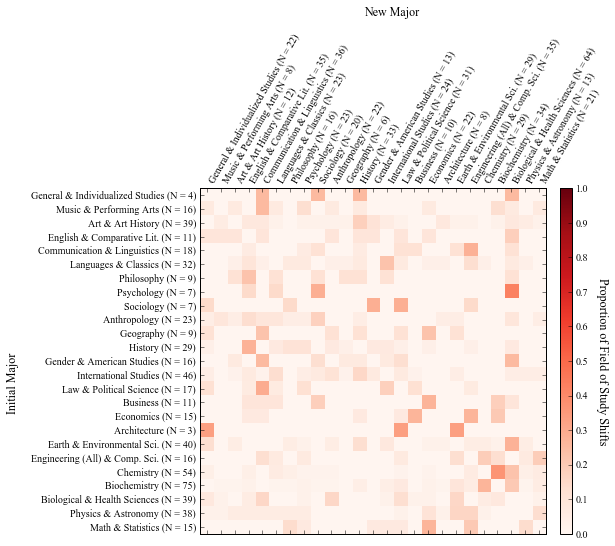

In [44]:
sumsAllNc = [str(int(x)) for x in np.sum(matrixAllNc, axis = 1)]
sumsFrNc = [str(int(x)) for x in np.sum(matrixFrNc, axis = 1)]
sums2yrNc = [str(int(x)) for x in np.sum(matrix2yrNc, axis = 1)]
sums4yrNc = [str(int(x)) for x in np.sum(matrix4yrNc, axis = 1)]
 
sumsAllColNc = [str(int(x)) for x in np.sum(matrixAllNc, axis = 0)]
sumsFrColNc = [str(int(x)) for x in np.sum(matrixFrNc, axis = 0)]
sums2yrColNc = [str(int(x)) for x in np.sum(matrix2yrNc, axis = 0)]
sums4yrColNc = [str(int(x)) for x in np.sum(matrix4yrNc, axis = 0)]

fig = pylab.figure(figsize=(8,8))
axmatrix = fig.add_axes([0.325,0.075,0.6,0.6])
idx1 = tags
idx2 = tags
im = axmatrix.matshow(normAllNc, origin = 'upper', cmap = pylab.cm.Reds, vmax = 1)
plt.xticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sumsAllColNc)], rotation = 60, ha = 'left')
plt.yticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sumsAllNc)])
axcolor = fig.add_axes([0.95,0.075,0.02,0.6])
cbar = pylab.colorbar(im, cax = axcolor)
cbar.ax.set_ylabel('Proportion of Field of Study Shifts', rotation = 270, labelpad = 20, fontsize = 'large')
#fig.savefig('heatAllNc.svg', format='svg', dpi=1200)

fig = pylab.figure(figsize=(8,8))
axmatrix = fig.add_axes([0.325,0.075,0.6,0.6])
idx1 = tags
idx2 = tags
im = axmatrix.matshow(normFrNc, origin = 'upper', cmap = pylab.cm.Reds, vmax = 1)
plt.xticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sumsFrColNc)], rotation = 60, ha = 'left')
plt.yticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sumsFrNc)])
axcolor = fig.add_axes([0.95,0.075,0.02,0.6])
cbar = pylab.colorbar(im, cax = axcolor)
cbar.ax.set_ylabel('Proportion of Field of Study Shifts', rotation = 270, labelpad = 20, fontsize = 'large')
plt.text(-48, 0.5, 'Initial Major', {'rotation':90, 'size': 'large'})
plt.text(-17, 1.5, 'New Major', {'size': 'large'})
#fig.savefig('heatFrNc.svg', format='svg', dpi=1200)

fig = pylab.figure(figsize=(8,8))
axmatrix = fig.add_axes([0.325,0.075,0.6,0.6])
idx1 = tags
idx2 = tags
im = axmatrix.matshow(norm2yrNc, origin = 'upper', cmap = pylab.cm.Reds, vmax = 1)
plt.xticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sums2yrColNc)], rotation = 60, ha = 'left')
plt.yticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sums2yrNc)])
axcolor = fig.add_axes([0.95,0.075,0.02,0.6])
cbar = pylab.colorbar(im, cax = axcolor)
cbar.ax.set_ylabel('Proportion of Field of Study Shifts', rotation = 270, labelpad = 20, fontsize = 'large')
plt.text(-48, 0.5, 'Initial Major', {'rotation':90, 'size': 'large'})
plt.text(-17, 1.5, 'New Major', {'size': 'large'})
#fig.savefig('heat2yrNc.svg', format='svg', dpi=1200)

fig = pylab.figure(figsize=(8,8))
axmatrix = fig.add_axes([0.325,0.075,0.6,0.6])
idx1 = tags
idx2 = tags
im = axmatrix.matshow(norm4yrNc, origin = 'upper', cmap = pylab.cm.Reds, vmax = 1)
plt.xticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sums4yrColNc)], rotation = 60, ha = 'left')
plt.yticks(range(0,len(tags)), [x + ' (N = ' + y + ')' for x,y in zip(tags, sums4yrNc)])
axcolor = fig.add_axes([0.95,0.075,0.02,0.6])
cbar = pylab.colorbar(im, cax = axcolor)
cbar.ax.set_ylabel('Proportion of Field of Study Shifts', rotation = 270, labelpad = 20, fontsize = 'large')
plt.text(-48, 0.5, 'Initial Major', {'rotation':90, 'size': 'large'})
plt.text(-17, 1.5, 'New Major', {'size': 'large'})
#fig.savefig('heat4yrNc.svg', format='svg', dpi=1200)